In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [109]:
setwd('/import/DB/fel/BJTC-204')

In [110]:
load('./exp4.rda')

In [111]:
head(exp4)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,Control,6.97,M,Caucasian,32,GSM2431721,6.918508,5.958536,7.389671,...,8.062601,8.039051,6.266754,4.402844,6.107446,5.091350,7.473668,7.085446,5.301909,5.986224
GSM2431722,0,Control,7.01,F,Caucasian,63,GSM2431722,6.397328,6.113981,7.629390,...,9.066047,8.447141,6.887356,4.383695,5.726334,4.867468,7.710730,7.402328,5.598268,6.171961
GSM2431723,0,Control,NA,F,Caucasian,70,GSM2431723,6.814676,6.261580,7.571414,...,8.630200,8.170023,6.914393,4.441707,5.981377,4.979711,7.519356,7.314417,5.538427,5.854754
GSM2431726,0,Control,NA,M,Caucasian,71,GSM2431726,7.550068,6.640444,8.030948,...,6.794395,7.583125,6.374021,4.632824,6.542643,5.345686,8.181581,6.815460,5.552289,6.125526
GSM2431727,0,Control,6.87,M,Caucasian,44,GSM2431727,6.336289,6.297053,7.947093,...,9.055285,8.653470,6.902694,4.552302,5.629537,5.043913,7.322026,7.413795,5.617718,5.891519
GSM2431728,0,MDD,7.05,M,Caucasian,66,GSM2431728,6.266404,5.972297,7.826966,...,8.993547,8.454228,6.859039,4.488690,5.823510,4.932490,7.483323,7.521739,5.512290,6.347157


In [125]:
dim(exp4)

[1]   251 11882

In [14]:
Type = exp4$TYPE

In [15]:
gene19 = read.table('./gene77.res.txt',col.names = 'gene')

In [115]:
y = ifelse(Type == 'Control',0,1)

In [116]:
y

[1] 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 [38] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
[112] 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [117]:
library(dplyr)

In [118]:
x = as.matrix(expr)
y = y

In [119]:
library(randomForest)

In [120]:
set.seed(103)

In [121]:
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

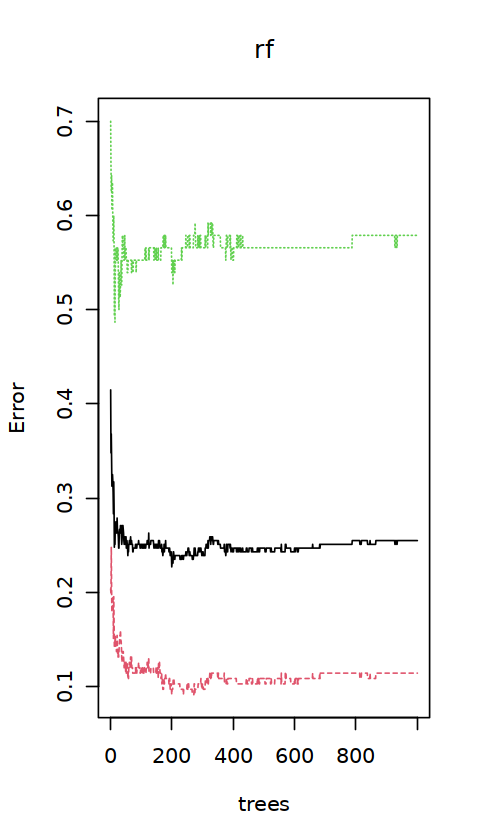

In [122]:
plot(rf)

In [25]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [26]:
trees = which.min(rf$err.rate[,1])

In [27]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [28]:
importance = importance(rf)

In [29]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [30]:
# RPE65 + MC3R+NFIL3 + PRF1 + IL6

In [31]:
options(repr.plot.width = 4)

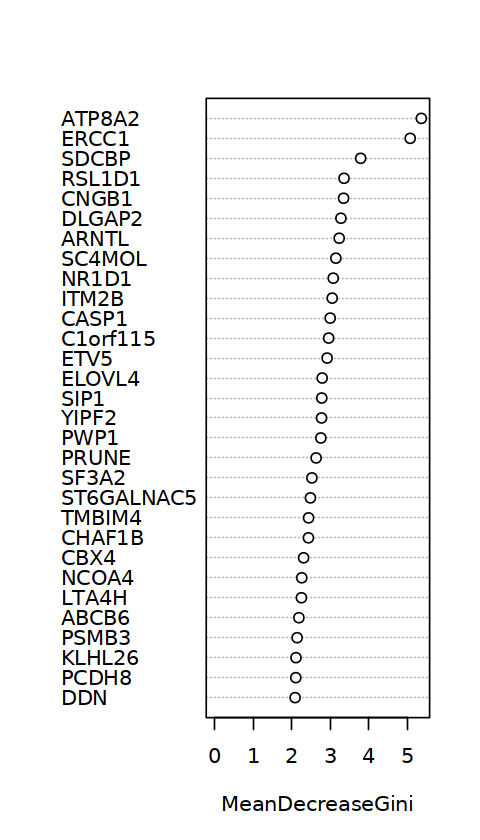

In [32]:
varImpPlot(rf,main = '')

In [33]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [34]:
rfGenes

ATP8A2      ERCC1      SDCBP     RSL1D1      CNGB1     DLGAP2      ARNTL 
  5.355254   5.067385   3.784717   3.353956   3.342016   3.273327   3.229110 
    SC4MOL      NR1D1      ITM2B      CASP1   C1orf115       ETV5     ELOVL4 
  3.142073   3.074590   3.047701   2.995907   2.955745   2.916647   2.788051 
      SIP1      YIPF2       PWP1      PRUNE      SF3A2 ST6GALNAC5     TMBIM4 
  2.777524   2.771668   2.754053   2.631431   2.521811   2.483685   2.435930 
    CHAF1B       CBX4      NCOA4      LTA4H      ABCB6      PSMB3     KLHL26 
  2.431962   2.307001   2.258774   2.249782   2.185340   2.139591   2.109784 
     PCDH8        DDN       ZW10     ZNF365    BHLHE40     WDYHV1        WAC 
  2.105027   2.087171   2.079227   2.035432   2.004627   1.923748   1.919475 
      MED7   SLC25A38     MICAL1       SAFB      AHSA1 
  1.911361   1.907783   1.807929   1.504535   1.438094

In [35]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# expr2 = exp4

# sigExp=expr2[rfGenes,]
# write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

# rfGenes

### svm

In [36]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# x = as.matrix(expr)

# y=as.numeric(as.factor(Type))

# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=as.factor(y),sizes =c(1:32),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# Profile

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [37]:
library(Boruta)

In [38]:
# x = as.matrix(expr)
y = ifelse(Type == 'Control',0,1)

In [39]:
y

[1] 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 [38] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
[112] 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [40]:
set.seed(111)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [41]:
boruta

Boruta performed 299 iterations in 18.96006 secs.
 7 attributes confirmed important: ARNTL, ATP8A2, CASP1, ERCC1, ETV5
and 2 more;
 32 attributes confirmed unimportant: ABCB6, AHSA1, BHLHE40, C1orf115,
CBX4 and 27 more;
 1 tentative attributes left: ST6GALNAC5;

In [42]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        1         7        32 

In [43]:
boruta$finalDecision

ABCB6      AHSA1       PWP1     ZNF365        DDN     RSL1D1      LTA4H 
  Rejected   Rejected  Confirmed   Rejected   Rejected   Rejected   Rejected 
     ARNTL      PCDH8        WAC     TMBIM4      PRUNE       SAFB     MICAL1 
 Confirmed   Rejected   Rejected   Rejected   Rejected   Rejected   Rejected 
     YIPF2   C1orf115      NCOA4 ST6GALNAC5     CHAF1B      CASP1       SIP1 
  Rejected   Rejected   Rejected  Tentative   Rejected  Confirmed   Rejected 
      CBX4    BHLHE40       ZW10     DLGAP2       MED7      NR1D1      CNGB1 
  Rejected   Rejected   Rejected   Rejected   Rejected   Rejected   Rejected 
     ERCC1       ETV5     ATP8A2   SLC25A38     WDYHV1     KLHL26      PSMB3 
 Confirmed  Confirmed  Confirmed   Rejected   Rejected   Rejected   Rejected 
    SC4MOL      SDCBP     ELOVL4      SF3A2      ITM2B 
 Confirmed   Rejected   Rejected   Rejected   Rejected 
Levels: Tentative Confirmed Rejected

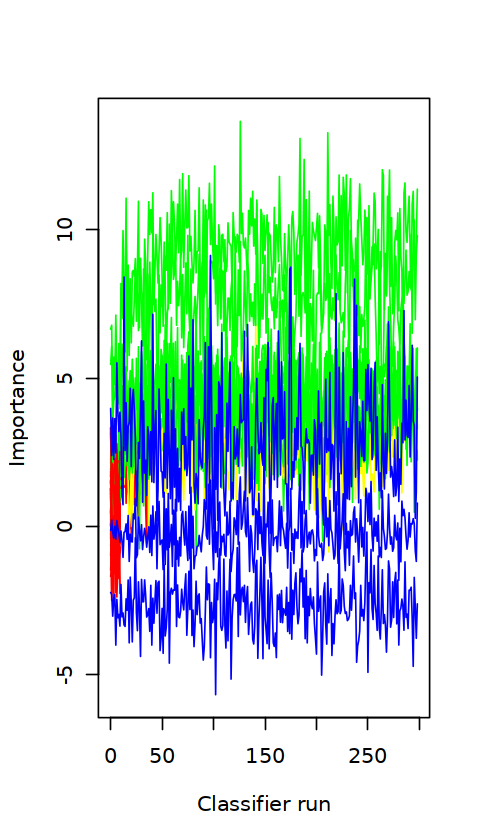

In [44]:
Boruta::plotImpHistory(boruta)

In [45]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


In [46]:
boruta

Boruta performed 299 iterations in 18.96006 secs.
 7 attributes confirmed important: ARNTL, ATP8A2, CASP1, ERCC1, ETV5
and 2 more;
 32 attributes confirmed unimportant: ABCB6, AHSA1, BHLHE40, C1orf115,
CBX4 and 27 more;
 1 tentative attributes left: ST6GALNAC5;

Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




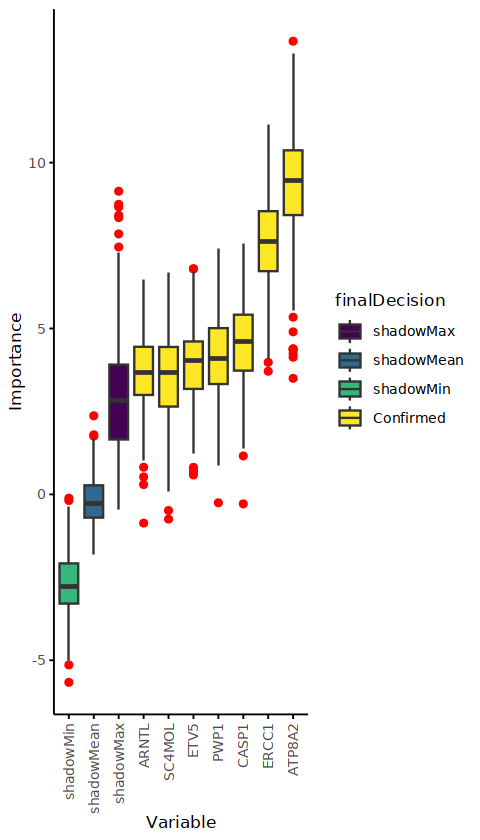

In [47]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [48]:
expr = cbind(Type,expr)

In [49]:
colnames(expr)[1]  ='Group'

In [50]:
expr3 = expr

In [51]:
set.seed(147)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [52]:
table(test$Group)


Control     MDD 
     57      26 

In [53]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'Matrix' was built under R version 4.2.3"


In [54]:
train_label <- as.numeric(train$Group == 'MDD')
test_label <-  as.numeric(test$Group == 'MDD')
all_label <-  as.numeric(expr3$Group == 'MDD')

In [55]:
all_label

[1] 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 [38] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
[112] 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [56]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [57]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.461989 
[2]	train-logloss:0.328879 
[3]	train-logloss:0.254002 
[4]	train-logloss:0.205468 
[5]	train-logloss:0.165907 
[6]	train-logloss:0.139572 
[7]	train-logloss:0.120194 
[8]	train-logloss:0.102082 
[9]	train-logloss:0.088439 
[10]	train-logloss:0.080066 
[11]	train-logloss:0.072059 
[12]	train-logloss:0.065013 
[13]	train-logloss:0.058861 
[14]	train-logloss:0.054689 
[15]	train-logloss:0.050842 
[16]	train-logloss:0.048040 
[17]	train-logloss:0.044958 
[18]	train-logloss:0.042311 
[19]	train-logloss:0.040543 
[20]	train-logloss:0.038561 
[21]	train-logloss:0.036794 
[22]	train-logloss:0.035458 
[23]	train-logloss:0.034122 
[24]	train-logloss:0.032944 
[25]	train-logloss:0.032064 


In [58]:
xgb

##### xgb.Booster
raw: 37.9 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 40 
niter: 25
nfeatures : 40 
evaluation_log:
    iter train_logloss
       1    0.46198939
       2    0.32887892
---                   
      24    0.03294414
      25    0.03206449

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
ATP8A2,0.11468590,0.09568332,0.04313725
CNGB1,0.05648451,0.04073318,0.02745098
CASP1,0.05475070,0.03681855,0.02352941
WAC,0.05208314,0.02973983,0.03137255
SDCBP,0.04730070,0.03656333,0.01960784
ERCC1,0.04238450,0.04155017,0.02352941


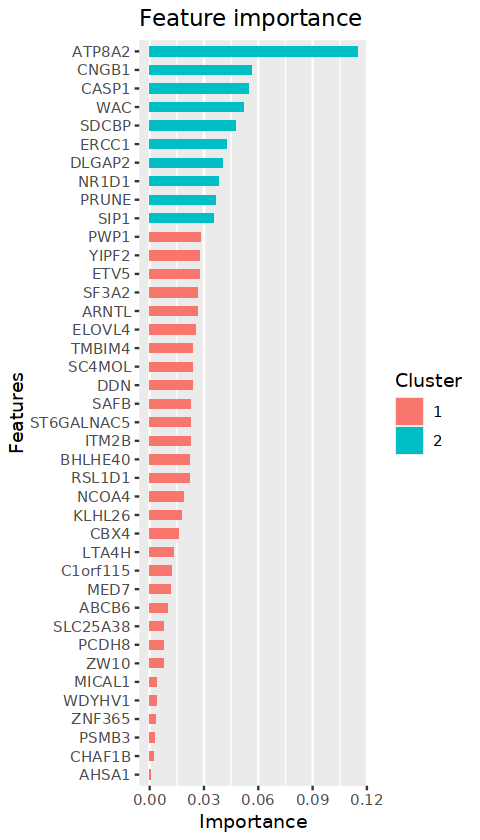

In [59]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

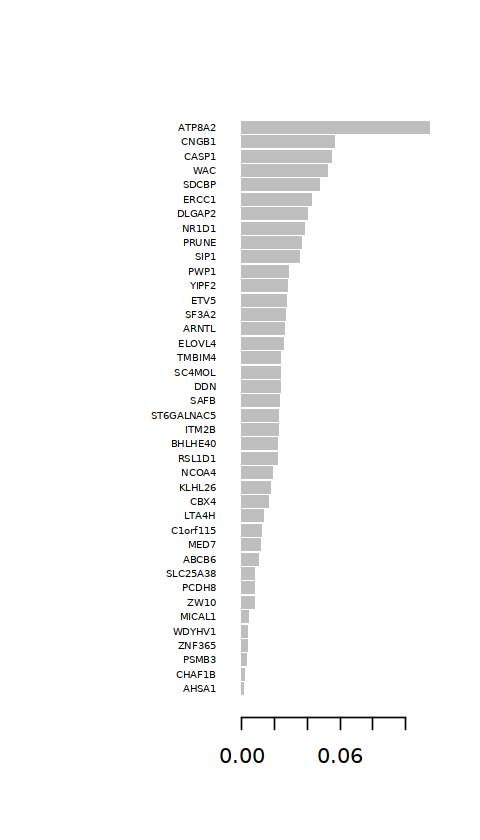

In [60]:
xgb.plot.importance(importance)

In [61]:
# lasso

In [62]:
library(lars) 
library(glmnet) 

Warning message:
"package 'lars' was built under R version 4.2.3"
Loaded lars 1.3


Warning message:
"package 'glmnet' was built under R version 4.2.3"
Loaded glmnet 4.1-8



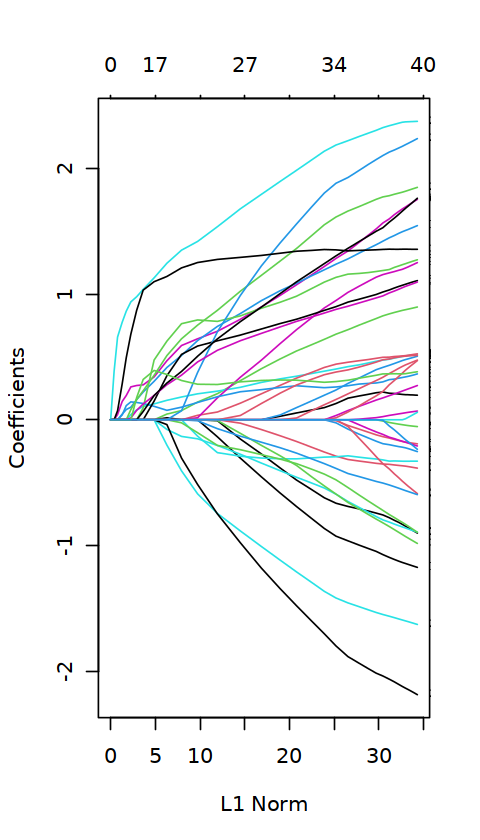

In [63]:
#用基因的表达情况预测生死
model_lasso <- glmnet(x, y, family="binomial", nlambda=50, alpha=1)#拉手回归模型
plot(model_lasso, xvar = "norm", label = TRUE)

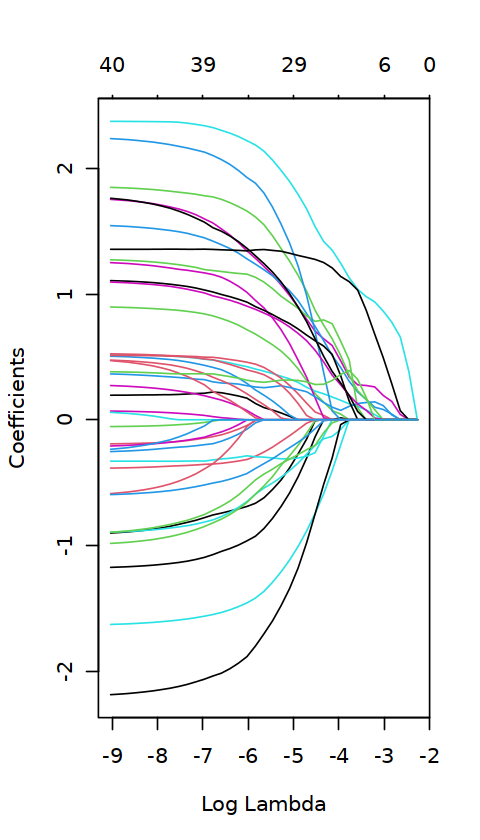

In [64]:
plot(model_lasso, xvar="lambda", label=TRUE)

In [65]:
cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

[1] 0.03382063 0.10328332

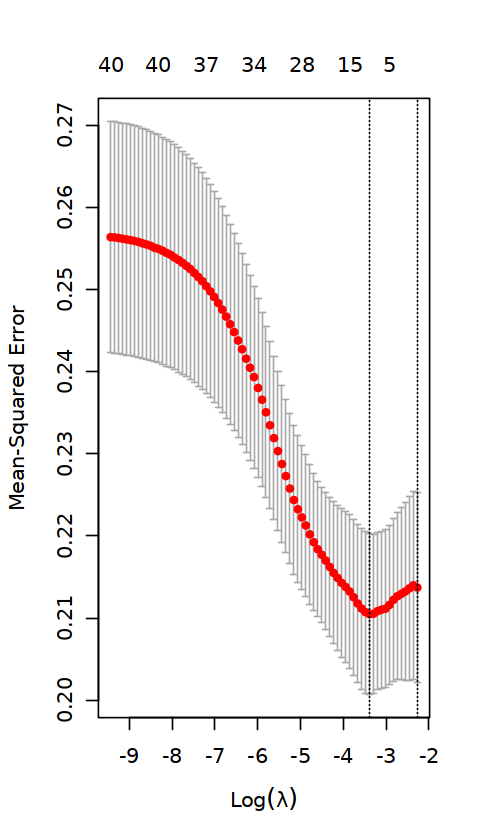

In [66]:
plot(cv_fit)
# 两条虚线分别指示了两个特殊的λ值:
c(cv_fit$lambda.min,cv_fit$lambda.1se) 

In [67]:
model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.min)
gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
gene_1se = gsub('[.]',' ',gene_1se)

In [68]:
gene_1se

[1] "DDN"      "RSL1D1"   "WAC"      "C1orf115" "NR1D1"    "ERCC1"    "ATP8A2"  
[8] "SC4MOL"   "SF3A2"

### 韦恩图

In [69]:
importance$Feature

[1] "ATP8A2"     "CNGB1"      "CASP1"      "WAC"        "SDCBP"     
 [6] "ERCC1"      "DLGAP2"     "NR1D1"      "PRUNE"      "SIP1"      
[11] "PWP1"       "YIPF2"      "ETV5"       "SF3A2"      "ARNTL"     
[16] "ELOVL4"     "TMBIM4"     "SC4MOL"     "DDN"        "SAFB"      
[21] "ST6GALNAC5" "ITM2B"      "BHLHE40"    "RSL1D1"     "NCOA4"     
[26] "KLHL26"     "CBX4"       "LTA4H"      "C1orf115"   "MED7"      
[31] "ABCB6"      "SLC25A38"   "PCDH8"      "ZW10"       "MICAL1"    
[36] "WDYHV1"     "ZNF365"     "PSMB3"      "CHAF1B"     "AHSA1"

In [70]:
RF.gene = names(rfGenes)[1:10]
#SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature[1:10]

In [71]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

In [72]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [73]:
lasso.gene  = gene_1se

In [74]:
list1 = list(RF.gene,lasso.gene,Boruta.gene,XGBoost.gene)

In [75]:
data =  as.data.frame (do.call (cbind, list1))

Warning message in (function (..., deparse.level = 1) :
"number of rows of result is not a multiple of vector length (arg 2)"


In [76]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"
Loading required package: grid

Loading required package: futile.logger

Warning message:
"package 'futile.logger' was built under R version 4.2.3"


png 
  2

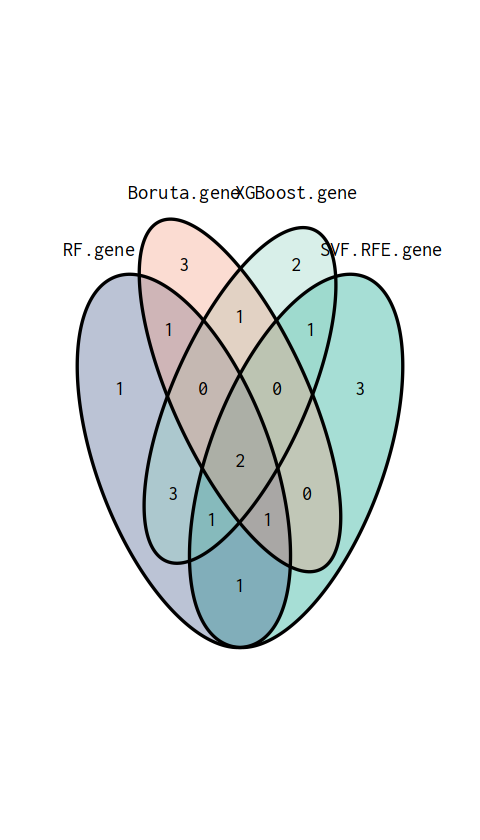

In [77]:
grid.draw(q)

In [78]:
model.gene = intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),lasso.gene)

In [79]:
model.gene = union(union(union(lasso.gene,Boruta.gene),XGBoost.gene),RF.gene)

In [83]:
model.gene  =lasso.gene

In [84]:
model.gene

[1] "DDN"      "RSL1D1"   "WAC"      "C1orf115" "NR1D1"    "ERCC1"    "ATP8A2"  
[8] "SC4MOL"   "SF3A2"

In [85]:
set.seed(1234)

In [86]:
expr3[expr3$Group =='MDD',]$Group<-1

In [87]:

expr3[expr3$Group =='Control',]$Group<-0
expr3$Group = as.numeric(expr3$Group)

In [88]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


In [89]:
dim(expr4)

[1] 251  10

In [90]:
head(expr4,7)

,Group,DDN,RSL1D1,WAC,C1orf115,NR1D1,ERCC1,ATP8A2,SC4MOL,SF3A2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,9.967489,6.700999,7.648159,9.480718,9.057711,7.778981,7.097292,7.438374,5.603057
GSM2431722,0,10.665196,6.869485,8.501034,9.889405,8.917168,7.664906,6.935712,8.482313,5.827260
GSM2431723,0,9.741411,6.356607,8.311259,9.269131,9.297167,7.459427,6.493616,8.268549,5.767221
GSM2431726,0,9.713532,6.508478,8.322875,8.369806,9.015055,7.827708,7.251606,6.124505,5.789535
GSM2431727,0,10.598663,6.682822,8.910536,9.613300,9.129851,7.932656,6.797717,8.014679,5.877133
GSM2431728,1,10.764859,6.756653,8.732182,9.989461,8.515435,7.883835,6.954378,8.043546,5.712920
GSM2431731,1,9.968563,6.474187,8.684001,9.685280,8.983710,7.549351,6.836432,8.664194,5.500182


In [91]:
library(caret)
library(ggplot2)

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


In [98]:
 a = c()

In [99]:
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "DDN 0.575413533834586"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "RSL1D1 0.611654135338346"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "WAC 0.613759398496241"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "C1orf115 0.594135338345865"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 250 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NR1D1 0.547067669172932"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ERCC1 0.640827067669173"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ATP8A2 0.648045112781955"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SC4MOL 0.547744360902256"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SF3A2 0.558947368421053"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [101]:
#expr4 = expr3

In [102]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

In [103]:
dim(expr4)

[1] 251  10

In [104]:
expr4 = expr4[,c('Group',a)]

In [105]:
varsU<-names(expr4[,2:9])

In [106]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



In [187]:
Result

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ERCC1,2.3551297,0.6860296,3.432986,0.0005969738,10.539495,2.853004,42.449462,ERCC1
ATP8A2,1.7468620,0.5942296,2.939709,0.0032852105,5.736573,1.845505,19.193728,ATP8A2
DDN,0.8528419,0.3652513,2.334945,0.0195462869,2.346305,1.176178,4.945488,DDN
ARNTL,1.2207493,0.5524561,2.209677,0.0271276093,3.389727,1.164324,10.260624,ARNTL
PWP1,0.9130829,0.4420187,2.065711,0.0388557869,2.491993,1.079440,6.143076,PWP1
C1orf115,0.7752499,0.3146496,2.463851,0.0137453090,2.171135,1.209693,4.167970,C1orf115
RSL1D1,1.3293225,0.4898820,2.713557,0.0066565202,3.778482,1.464585,10.054395,RSL1D1
ST6GALNAC5,0.4194621,0.1853372,2.263237,0.0236210564,1.521143,1.062863,2.203081,ST6GALNAC5


In [188]:
Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

In [201]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [202]:
Uni_log[tzgene,]

,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ERCC1,2.3551297,0.0005969738,10.539495,2.853004,42.449462,ERCC1
ATP8A2,1.7468620,0.0032852105,5.736573,1.845505,19.193728,ATP8A2
DDN,0.8528419,0.0195462869,2.346305,1.176178,4.945488,DDN
ARNTL,1.2207493,0.0271276093,3.389727,1.164324,10.260624,ARNTL
PWP1,0.9130829,0.0388557869,2.491993,1.079440,6.143076,PWP1
C1orf115,0.7752499,0.0137453090,2.171135,1.209693,4.167970,C1orf115
RSL1D1,1.3293225,0.0066565202,3.778482,1.464585,10.054395,RSL1D1
ST6GALNAC5,0.4194621,0.0236210564,1.521143,1.062863,2.203081,ST6GALNAC5


### 多因素分析

In [203]:
tzgene

[1] "ERCC1"      "ATP8A2"     "DDN"        "ARNTL"      "PWP1"      
[6] "C1orf115"   "RSL1D1"     "ST6GALNAC5"

In [204]:
data = expr4[,c('Group',tzgene)]

In [205]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5100  -0.8658  -0.5976   1.1400   2.3509  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -41.6661     9.4595  -4.405 1.06e-05 ***
ERCC1         1.4383     0.8084   1.779   0.0752 .  
ATP8A2        1.6755     0.7552   2.219   0.0265 *  
DDN           0.4271     0.5437   0.786   0.4322    
ARNTL         0.1279     0.6601   0.194   0.8464    
PWP1          0.7614     0.7925   0.961   0.3367    
C1orf115      0.3985     0.7180   0.555   0.5788    
RSL1D1        1.0222     0.8089   1.264   0.2064    
ST6GALNAC5   -0.4402     0.3811  -1.155   0.2480    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 307.83  on 250  degrees of freedom
Residual deviance: 280.77  on 242  degrees of freedom
AIC: 298.77

Number of Fisher Scoring ite

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-41.666,19.401,0(0~0),<0.001
ERCC1,1.438,3.166,4.214(0.871~21.186),0.075
ATP8A2,1.676,4.923,5.342(1.232~24.198),0.027
DDN,0.427,0.617,1.533(0.535~4.553),0.432
ARNTL,0.128,0.038,1.136(0.311~4.193),0.846
PWP1,0.761,0.923,2.141(0.461~10.432),0.337
C1orf115,0.399,0.308,1.49(0.374~6.298),0.579
RSL1D1,1.022,1.597,2.779(0.578~13.948),0.206
ST6GALNAC5,-0.440,1.334,0.644(0.301~1.349),0.248


In [206]:
fit.reduce<-glm(Group~. ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5100  -0.8658  -0.5976   1.1400   2.3509  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -41.6661     9.4595  -4.405 1.06e-05 ***
ERCC1         1.4383     0.8084   1.779   0.0752 .  
ATP8A2        1.6755     0.7552   2.219   0.0265 *  
DDN           0.4271     0.5437   0.786   0.4322    
ARNTL         0.1279     0.6601   0.194   0.8464    
PWP1          0.7614     0.7925   0.961   0.3367    
C1orf115      0.3985     0.7180   0.555   0.5788    
RSL1D1        1.0222     0.8089   1.264   0.2064    
ST6GALNAC5   -0.4402     0.3811  -1.155   0.2480    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 307.83  on 250  degrees of freedom
Residual deviance: 280.77  on 242  degrees of freedom
AIC: 298.77

Number of Fisher Scoring ite

In [207]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=298.77
Group ~ ERCC1 + ATP8A2 + DDN + ARNTL + PWP1 + C1orf115 + RSL1D1 + 
    ST6GALNAC5

             Df Deviance    AIC
- ARNTL       1   280.80 296.80
- C1orf115    1   281.08 297.08
- DDN         1   281.39 297.39
- PWP1        1   281.70 297.70
- ST6GALNAC5  1   282.12 298.12
- RSL1D1      1   282.38 298.38
<none>            280.76 298.76
- ERCC1       1   283.97 299.97
- ATP8A2      1   285.78 301.78

Step:  AIC=296.8
Group ~ ERCC1 + ATP8A2 + DDN + PWP1 + C1orf115 + RSL1D1 + ST6GALNAC5

             Df Deviance    AIC
- C1orf115    1   281.12 295.12
- DDN         1   281.52 295.52
- PWP1        1   281.83 295.83
- ST6GALNAC5  1   282.12 296.12
- RSL1D1      1   282.41 296.41
<none>            280.80 296.80
- ERCC1       1   283.97 297.97
+ ARNTL       1   280.76 298.76
- ATP8A2      1   286.50 300.50

Step:  AIC=295.12
Group ~ ERCC1 + ATP8A2 + DDN + PWP1 + RSL1D1 + ST6GALNAC5

             Df Deviance    AIC
- ST6GALNAC5  1   282.22 294.22
- PWP1        1   283.07 295


Call:
glm(formula = Group ~ ERCC1 + ATP8A2 + DDN + RSL1D1, family = binomial(), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3390  -0.8607  -0.6246   1.1981   2.3241  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -34.1906     7.2718  -4.702 2.58e-06 ***
ERCC1         1.2542     0.7808   1.606   0.1082    
ATP8A2        1.4385     0.6831   2.106   0.0352 *  
DDN           0.6662     0.3683   1.809   0.0705 .  
RSL1D1        1.0779     0.5237   2.058   0.0396 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 307.83  on 250  degrees of freedom
Residual deviance: 283.21  on 246  degrees of freedom
AIC: 293.21

Number of Fisher Scoring iterations: 4


In [208]:
# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-34.191,22.107,0(0~0),<0.001
ERCC1,1.254,2.580,3.505(0.762~16.612),0.108
ATP8A2,1.439,4.434,4.214(1.13~16.692),0.035
DDN,0.666,3.272,1.947(0.966~4.131),0.070
RSL1D1,1.078,4.237,2.939(1.061~8.327),0.040


In [209]:
library(autoReg)

In [210]:
overall.log =  glm(Group~.,data=data,family=binomial())

model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)

model3

name,desc,0 (N=175),1 (N=76),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ERCC1,Mean <U+00B1> SD,7.6 <U+00B1> 0.2,7.7 <U+00B1> 0.2,ERCC1,"10.54 (2.75-40.44, p<.001)","4.21 (0.86-20.55, p=.075)"
ATP8A2,Mean <U+00B1> SD,6.7 <U+00B1> 0.2,6.8 <U+00B1> 0.2,ATP8A2,"5.74 (1.79-18.38, p=.003)","5.34 (1.22-23.47, p=.026)"
DDN,Mean <U+00B1> SD,10.1 <U+00B1> 0.4,10.3 <U+00B1> 0.4,DDN,"2.35 (1.15-4.80, p=.019)","1.53 (0.53-4.45, p=.432)"
ARNTL,Mean <U+00B1> SD,6.8 <U+00B1> 0.3,6.9 <U+00B1> 0.3,ARNTL,"3.39 (1.15-10.01, p=.027)","1.14 (0.31-4.14, p=.846)"
PWP1,Mean <U+00B1> SD,7.5 <U+00B1> 0.4,7.6 <U+00B1> 0.3,PWP1,"2.49 (1.05-5.93, p=.039)","2.14 (0.45-10.12, p=.337)"
C1orf115,Mean <U+00B1> SD,9.6 <U+00B1> 0.6,9.8 <U+00B1> 0.4,C1orf115,"2.17 (1.17-4.02, p=.014)","1.49 (0.36-6.08, p=.579)"
RSL1D1,Mean <U+00B1> SD,6.7 <U+00B1> 0.3,6.8 <U+00B1> 0.3,RSL1D1,"3.78 (1.45-9.87, p=.007)","2.78 (0.57-13.57, p=.206)"
ST6GALNAC5,Mean <U+00B1> SD,7.2 <U+00B1> 0.8,7.4 <U+00B1> 0.8,ST6GALNAC5,"1.52 (1.06-2.19, p=.024)","0.64 (0.31-1.36, p=.248)"


In [147]:
set.seed(21)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~ATP8A2+ERCC1+PWP1 ,data=train,family=binomial())  #TNFSF14+CCNA2+MARCKS+SGOL1+SAP130
    
  model_pre<-predict(model,type='response', newdata=test)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(test[,1]),model_pre)))
}
mean(auc_value)

ERROR: Error in eval(predvars, data, env): object 'PWP1' not found


In [97]:
summary(fit.reduce) #查看构建的模型
fitted.prob<-predict(fit.reduce, newdata = data, type = "response")  #这里不需要变动
data$pred<-fit.reduce$fitted.values
m<-pROC::roc(data$Group,data[,"pred"])  #这里要把Y改为自己的结局变量即可


Call:
glm(formula = Group ~ RPE65 + MC3R + DRD3 + RELB + PRF1, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.09279  -0.70183   0.02053   0.72513   1.84444  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   9.1037     4.5460   2.003   0.0452 * 
RPE65        -1.4752     0.5688  -2.594   0.0095 **
MC3R         -1.2752     0.5846  -2.182   0.0291 * 
DRD3         -1.0804     0.5528  -1.954   0.0507 . 
RELB         -0.1619     0.7859  -0.206   0.8367   
PRF1         -0.7167     0.4253  -1.685   0.0920 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 81.774  on 58  degrees of freedom
Residual deviance: 50.977  on 53  degrees of freedom
AIC: 62.977

Number of Fisher Scoring iterations: 6


Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [99]:
options(repr.plot.width = 6)

Area under the curve: 0.8747

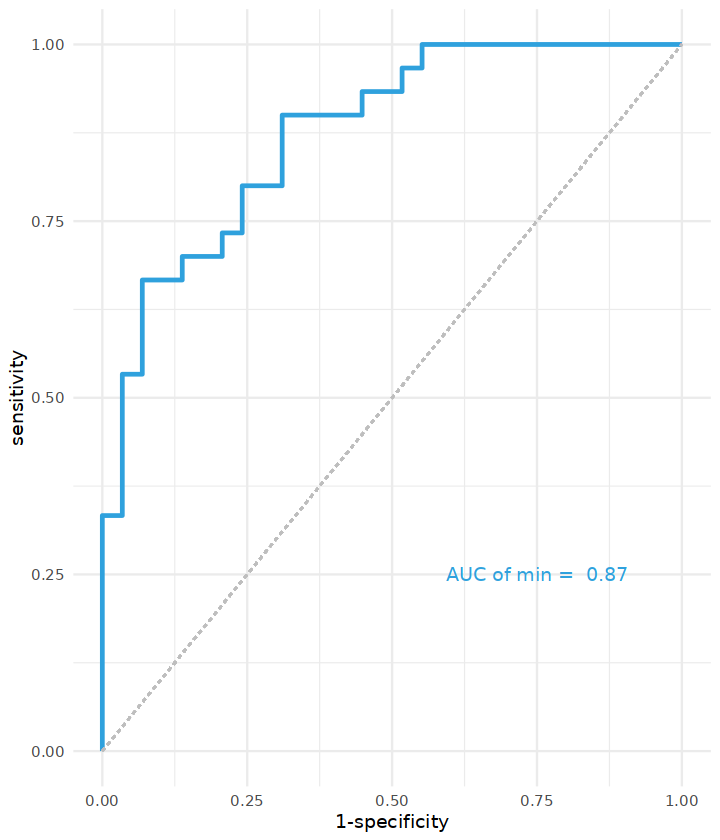

In [100]:
g <- pROC::ggroc(m,legacy.axes = T,size = 1,color = "#2fa1dd")
pROC::auc(m)  # Area under the curve: 0.9953

g + theme_minimal() +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), 
               colour = "grey", linetype = "dashed")+
  annotate("text",x = .75, y = .25,
           label = paste("AUC of min = ",format(round(as.numeric(pROC::auc(m)),2),nsmall = 2)),color = "#2fa1dd")

In [101]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 4.2.3"


In [102]:
dd<-datadist(data)  #开始打包数据
options(datadist="dd")

In [103]:
data$Group = as.factor(data$Group)

In [104]:
fit1 <- lrm(Group~RPE65 + DRD3+ MC3R+RELB  + PRF1, data=data,x=T,y=T)


In [105]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [106]:
#  https://blog.csdn.net/Ayue0616/article/details/126601832

In [107]:
# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

In [117]:
# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

In [ ]:
# https://blog.csdn.net/Dr_long1996/article/details/135446784

In [118]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [109]:
save(fit1,data,file = 'bulk2.fit1.rda')

In [110]:
#列线图代码只能在Rstudio话

In [111]:
# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

In [112]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)

Waiting for profiling to be done...



In [116]:
library(forestplot)
fp<-read.csv("forestplot_example.csv",header=T)

# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=0,
#            boxsize=0.2,
#            graph.pos=2)

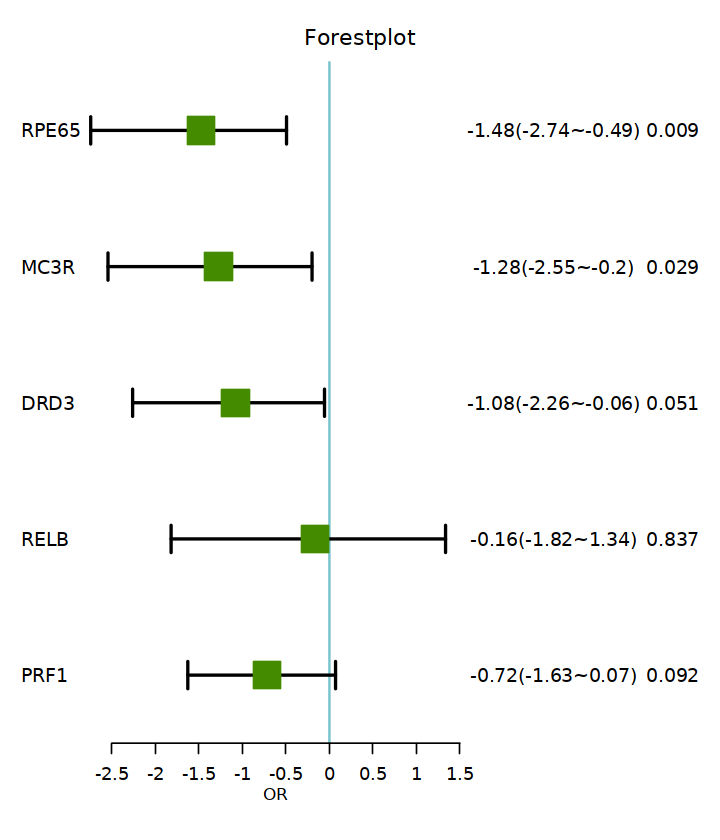

In [115]:
forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           lineheight = unit(7,'mm'),
           colgap=unit(2,'mm'),
           lwd.zero=1.5,
           lwd.ci=2, 
           col=fpColors(box='#458B00',
                        summary='#8B008B',
                        lines = 'black',
                        zero = '#7AC5CD'),
           xlab="OR",
           lwd.xaxis =1,
           txt_gp = fpTxtGp(ticks = gpar(cex = 0.85),
                            xlab  = gpar(cex = 0.8),
                            cex = 0.9),
           lty.ci = "solid",
           title = "Forestplot", 
           line.margin = 0.08,
           graph.pos=2)


In [209]:
nmfinput= data[MDD,c('RPE65' ,'DRD3','MC3R','RELB' , 'PRF1')] %>%  t() %>%  as.data.frame()

In [210]:
library(NMF)

In [211]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_point()`)."


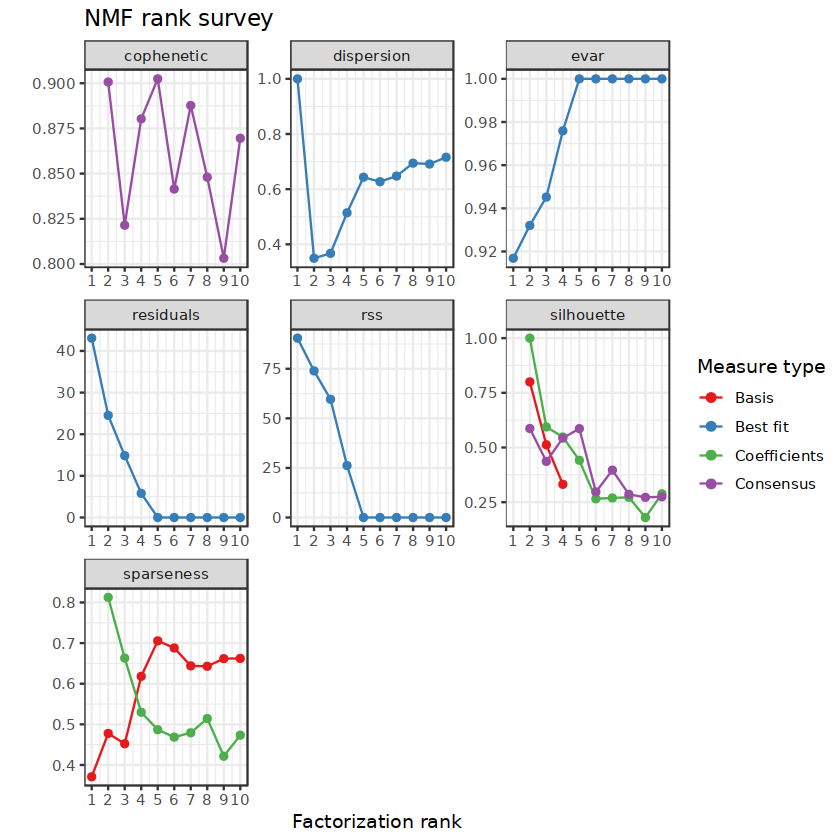

In [212]:
plot(estim.coad)

In [213]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
21  9 

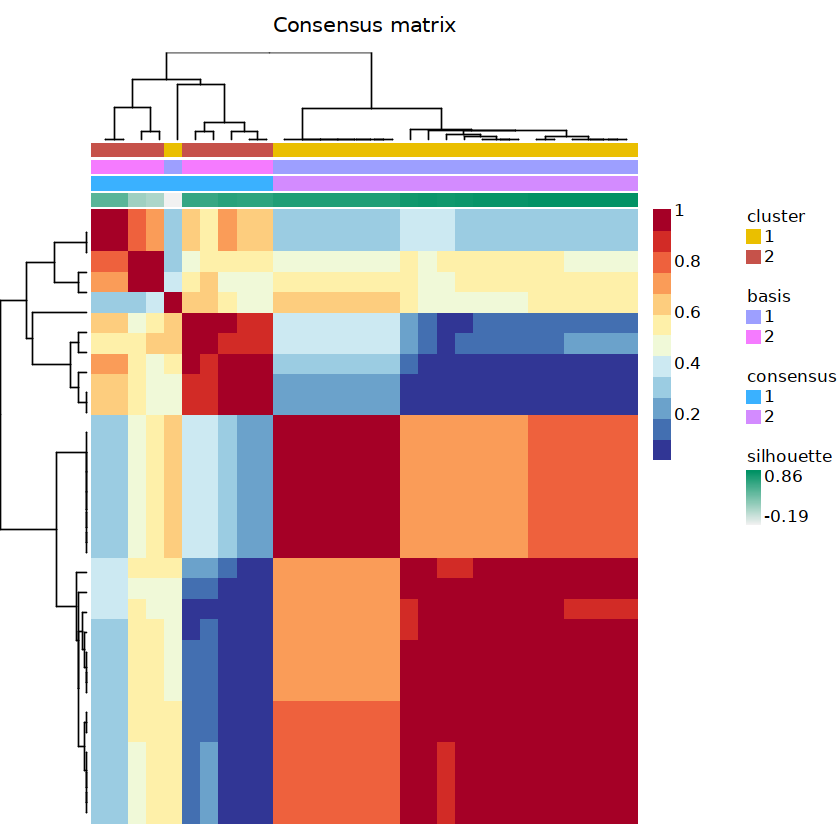

In [214]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [215]:
library(tinyarray)

In [225]:
data1 = data[MDD,-1] %>%  t() %>% as.data.frame()

In [226]:
a = data1[,colnames(nmfinput)]

In [227]:
cg=names(tail(sort(apply(a,1,sd)),12000))
n=a[cg,]

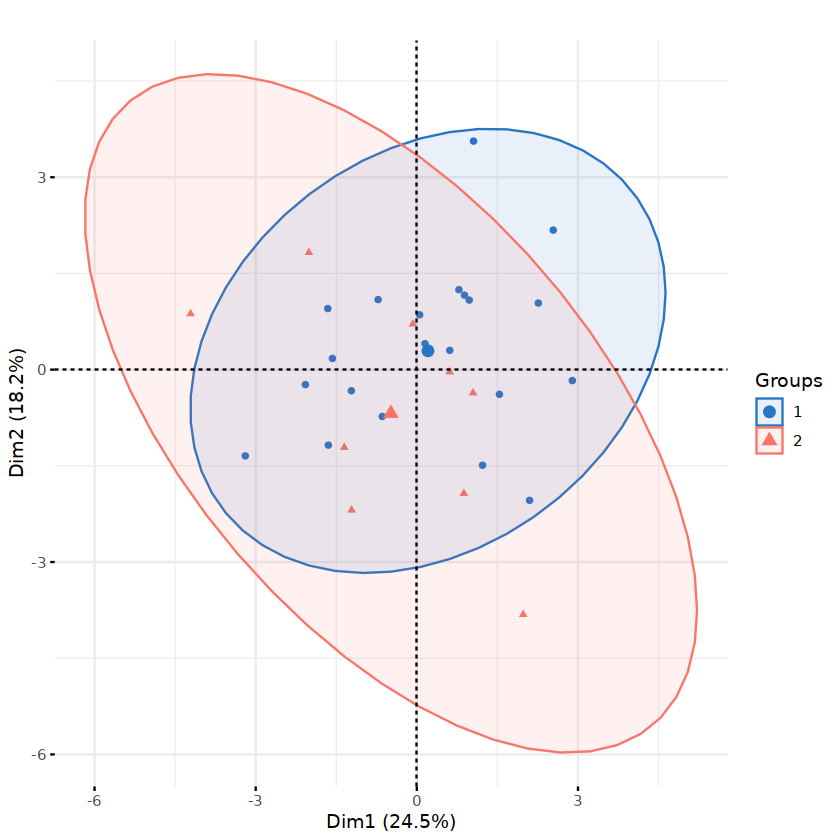

In [228]:
draw_pca(n,group)

In [231]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
V10,49.59959,172.010281,2
V15,207.23713,-79.947753,2
V16,201.56723,-89.036425,1
V18,-43.43508,3.824127,2
V19,-185.23555,98.308446,1
V20,-37.09595,-82.671437,1


In [294]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [295]:
bulk2.group = pdat1[,c(1,4)]
write.csv(bulk2.group,file = 'bulk2.group.csv',row.names =F)

In [296]:
dim(bulk2.group)

[1] 30  2

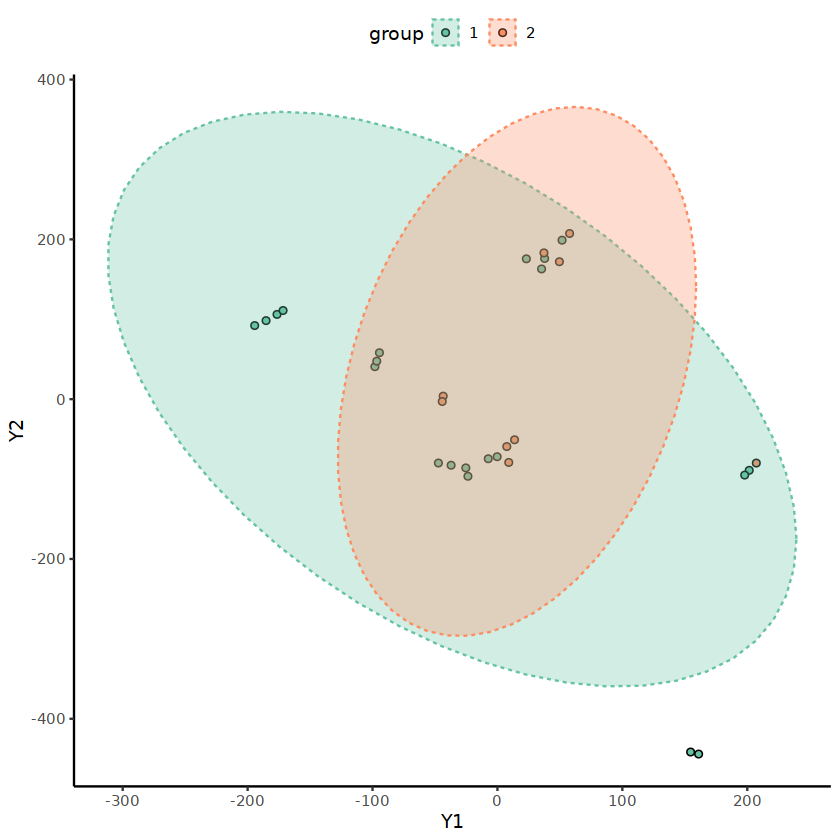

In [232]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")